# Explore highly co-expressed genes
In the previous [notebook](2_explore_data.ipynb) we observed that using 39 samples with 201 PAO1-specific genes, that the correlation of accessory-accessory genes is higher compared to the correlation of core-core and core-accessory genes.

Based on this finding, we want to know: *What can explain this difference in correlation distribution?*

This notebook performs a follow-up analysis. In particular this notebook performs a deeper examination of the correlation structure per group (core-core, core-accessory, accessory-accessory) by looking at the trends of the nearest neighbors (i.e. highly correlated genes) of each gene.

In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import calculations

np.random.seed(123)

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Input
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

base_intermediate_dir = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "tmp")

core_gene_ids_file = os.path.join(
    base_intermediate_dir,
    "core_gene_ids.pickle")

acc_gene_ids_file = os.path.join(
    base_intermediate_dir,
    "acc_gene_ids.pickle")

real_all_corr_file = os.path.join(
    base_intermediate_dir,
    "real_all_corr.pickle")

shuffled_all_corr_file = os.path.join(
    base_intermediate_dir,
    "shuffled_all_corr.pickle")

# Import Pseudomonas operon annotations from ADAGE repo
# Original source of data is from DOOR
# https://github.com/greenelab/adage/blob/master/Genome_organization/operon_3.txt
# Operons containing at least 3 genes
operon_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "annotations",
    "DOOR_operon_3.txt")

In [3]:
# Read in gene ids
core_gene_ids = pickle.load(open(core_gene_ids_file, "rb"))
acc_gene_ids = pickle.load(open(acc_gene_ids_file, "rb"))

# Get number of core and accessory genes
num_core_genes = len(core_gene_ids)
num_acc_genes = len(acc_gene_ids)
num_all_genes = num_core_genes + num_acc_genes

# Examine highly co-expressed gene clusters
For each core gene we will:
1. Extract the number of genes that are highly co-expressed with it
2. Determine the ratio of co-expressed genes that are core vs accessory

Repeat this for each accessory gene

In [4]:
# Define threshold for highly co-expressed genes
coexpression_threshold = 0.75

### Co-expression patterns in real data

In [5]:
# Get co-expression patterns using real expression data
real_core_df, real_acc_df = calculations.get_coexpression_stats(real_all_corr_file,
                                                                operon_file,
                                                                core_gene_ids_file,
                                                                acc_gene_ids_file,
                                                                coexpression_threshold)

In [6]:
real_core_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0001,PA0001,8,8,0,1.000000,0.000000,8,8,0,1.000000,0.000000
PA0002,PA0002,167,166,1,0.994012,0.005988,166,165,1,0.993976,0.006024
PA0003,PA0003,85,85,0,1.000000,0.000000,84,84,0,1.000000,0.000000
PA0004,PA0004,145,145,0,1.000000,0.000000,145,145,0,1.000000,0.000000
PA0005,PA0005,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000


In [7]:
real_acc_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,195,145,50,0.743590,0.256410,195,145,50,0.743590,0.256410
PA0095,PA0095,8,7,1,0.875000,0.125000,8,7,1,0.875000,0.125000
PA0100,PA0100,103,59,44,0.572816,0.427184,102,58,44,0.568627,0.431373
PA0135,PA0135,14,6,8,0.428571,0.571429,14,6,8,0.428571,0.571429
PA0187,PA0187,1,0,1,0.000000,0.000000,1,0,1,0.000000,0.000000


## Co-expression patterns in shuffled data

In [8]:
# Get co-expression patterns using shuffled expression data (control)
shuffled_core_df, shuffled_acc_df = calculations.get_coexpression_stats(shuffled_all_corr_file,
                                                                operon_file,
                                                                core_gene_ids_file,
                                                                acc_gene_ids_file,
                                                                coexpression_threshold)

shuffled_core_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0001,PA0001,0,0,0,0.0,0.0,0,0,0,0.0,0.0
PA0002,PA0002,0,0,0,0.0,0.0,0,0,0,0.0,0.0
PA0003,PA0003,0,0,0,0.0,0.0,0,0,0,0.0,0.0
PA0004,PA0004,0,0,0,0.0,0.0,0,0,0,0.0,0.0
PA0005,PA0005,0,0,0,0.0,0.0,0,0,0,0.0,0.0


In [9]:
shuffled_acc_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,0,0,0,0,0,0,0,0,0,0
PA0095,PA0095,0,0,0,0,0,0,0,0,0,0
PA0100,PA0100,0,0,0,0,0,0,0,0,0,0
PA0135,PA0135,0,0,0,0,0,0,0,0,0,0
PA0187,PA0187,0,0,0,0,0,0,0,0,0,0


# Plot trends in co-expression data

### Number of co-expressed genes

In [10]:
# Get bins using all data
hist, bins_num_coexpressed_real = np.histogram(np.concatenate([real_core_df['num_coexpressed_genes'].values,
                                                               real_acc_df['num_coexpressed_genes'].values]))

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

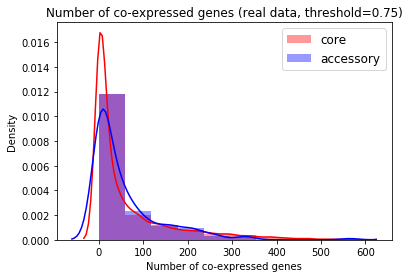

In [11]:
# Distribution of number of co-expressed genes in real data
sns.distplot(real_core_df['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             bins=bins_num_coexpressed_real)

sns.distplot(real_acc_df['num_coexpressed_genes'].tolist(), 
             label='accessory',
             color='blue',
             bins=bins_num_coexpressed_real)

plt.legend(prop={'size': 12})
plt.title('Number of co-expressed genes (real data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

In [12]:
# Get bins using all data
hist, bins_num_coexpressed_shuffled = np.histogram(np.concatenate([shuffled_core_df['num_coexpressed_genes'].values,
                                                                   shuffled_acc_df['num_coexpressed_genes'].values]))

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

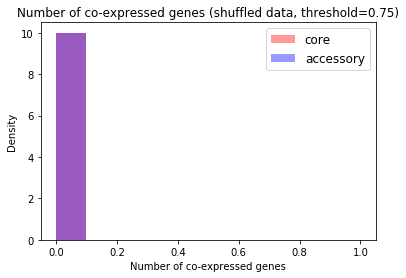

In [13]:
# Distribution of number of co-expressed genes in shuffled data
sns.distplot(shuffled_core_df['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             bins=bins_num_coexpressed_shuffled)

sns.distplot(shuffled_acc_df['num_coexpressed_genes'].tolist(), 
             label='accessory', 
             color='blue',
             bins=bins_num_coexpressed_shuffled)

plt.legend(prop={'size': 12})
plt.title('Number of co-expressed genes (shuffled data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

In [14]:
# Print statistics about co-expressed genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- For a given CORE gene, there is a median of {} co-expressed  genes'.
      format(np.median(real_core_df['num_coexpressed_genes'])))
print('- For a given ACCESSORY gene, there is a median of {} co-expressed  genes \n'.
      format(np.median(real_acc_df['num_coexpressed_genes'])))

# For shuffled data
print('Using a threshold of {} to define co-expression (shuffled data): \n'.
     format(coexpression_threshold))
print('- For a given CORE gene, there is a median of {} co-expressed  genes'.
      format(np.median(shuffled_core_df['num_coexpressed_genes'])))
print('- For a given ACCESSORY gene, there is a median of {} co-expressed  genes'.
      format(np.median(shuffled_acc_df['num_coexpressed_genes'])))

Using a threshold of 0.75 to define co-expression (real data): 

- For a given CORE gene, there is a median of 18.0 co-expressed  genes
- For a given ACCESSORY gene, there is a median of 22.0 co-expressed  genes 

Using a threshold of 0.75 to define co-expression (shuffled data): 

- For a given CORE gene, there is a median of 0.0 co-expressed  genes
- For a given ACCESSORY gene, there is a median of 0.0 co-expressed  genes


**Observation:**
* Most core and accessory genes are not co-expressed with other genes
* As you decrease the threshold, many core and accessory genes are co-expressed with 0 to several genes
* (control) All genes are independent, as expected, since we have destroyed relationships between genes when we shuffled
* If using a more strict definition...

### Percent of co-expressed genes that are not in the same operon

In [15]:
# Calculate the percent of co-expressed genes that are non co-operonic (real data)
real_percent_non_cooperonic_coexpressed_core_genes = (
    real_core_df['num_non_cooperonic_coexpressed_genes']/real_core_df['num_coexpressed_genes'])

real_percent_non_cooperonic_coexpressed_acc_genes = (
    real_acc_df['num_non_cooperonic_coexpressed_genes']/real_acc_df['num_coexpressed_genes'])

# There are NaNs in cases where there are 0 co-expressed genes and therefore 0 non-cooperonic genes
real_num_core_na = real_percent_non_cooperonic_coexpressed_core_genes.isna().sum()
real_num_acc_na = real_percent_non_cooperonic_coexpressed_acc_genes.isna().sum()

# Since we are concerned with "of those co-expressed genes how many are in NOT in the same operon", we will remove these
real_percent_non_cooperonic_coexpressed_core_genes_noNa = real_percent_non_cooperonic_coexpressed_core_genes.dropna(inplace=False)
real_percent_non_cooperonic_coexpressed_acc_genes_noNa = real_percent_non_cooperonic_coexpressed_acc_genes.dropna(inplace=False)

Text(0, 0.5, 'Density')

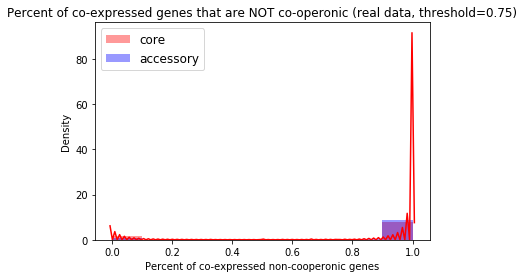

In [16]:
## TEST: What does distribution look like before removing NaNs?

# Get bins using all data
hist, bins_num_percent_non_cooperonic_real = np.histogram(
    np.concatenate(
        [real_percent_non_cooperonic_coexpressed_core_genes.fillna(0),
         real_percent_non_cooperonic_coexpressed_acc_genes.fillna(0)]
    )
)
# Distribution of percent of co-expressed genes that are NOT co-operonic in real data
sns.distplot(real_percent_non_cooperonic_coexpressed_core_genes.fillna(0),
             label='core',
             color='red',
             bins=bins_num_percent_non_cooperonic_real)
sns.distplot(real_percent_non_cooperonic_coexpressed_acc_genes.fillna(0), 
             label='accessory',
             color='blue', 
             bins=bins_num_percent_non_cooperonic_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

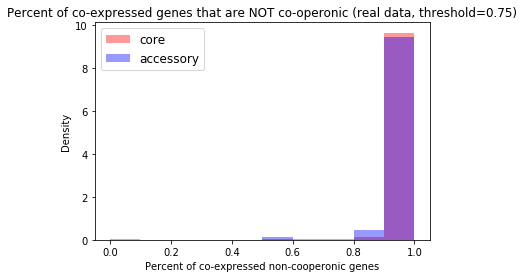

In [17]:
# Get bins using all data
hist, bins_num_percent_non_cooperonic_real = np.histogram(
    np.concatenate(
        [real_percent_non_cooperonic_coexpressed_core_genes_noNa,
         real_percent_non_cooperonic_coexpressed_acc_genes_noNa]
    )
)

# Distribution of percent of co-expressed genes that are NOT co-operonic in real data
sns.distplot(real_percent_non_cooperonic_coexpressed_core_genes_noNa,
             label='core',
             color='red',
             bins=bins_num_percent_non_cooperonic_real)
sns.distplot(real_percent_non_cooperonic_coexpressed_acc_genes_noNa, 
             label='accessory',
             color='blue', 
             bins=bins_num_percent_non_cooperonic_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes')
plt.ylabel('Density')

In [18]:
# Calculate the percent of co-expressed genes that are non co-operonic (shuffled data)
shuffled_percent_non_cooperonic_coexpressed_core_genes = (
    shuffled_core_df['num_non_cooperonic_coexpressed_genes']/shuffled_core_df['num_coexpressed_genes'])

shuffled_percent_non_cooperonic_coexpressed_acc_genes = (
    shuffled_acc_df['num_non_cooperonic_coexpressed_genes']/shuffled_acc_df['num_coexpressed_genes'])

# There are NaNs in cases where there are 0 co-expressed genes and therefore 0 non-cooperonic genes
shuffled_num_core_na = shuffled_percent_non_cooperonic_coexpressed_core_genes.isna().sum()
shuffled_num_acc_na = shuffled_percent_non_cooperonic_coexpressed_acc_genes.isna().sum()

# Since we are concerned with "of those co-expressed genes how many are in NOT in the same operon", we will remove these
shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa = shuffled_percent_non_cooperonic_coexpressed_core_genes.dropna(
    inplace=False)
shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa = shuffled_percent_non_cooperonic_coexpressed_acc_genes.dropna(
    inplace=False)

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'Density')

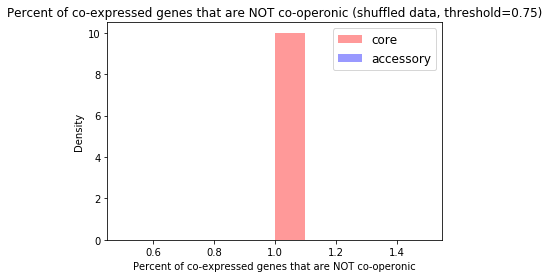

In [19]:
# Get bins using all data
hist, bins_num_percent_non_cooperonic_shuffled = np.histogram(
    np.concatenate([shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa,
                    shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa]))

# Distribution of percent of co-expressed genes that are NOT co-operonic in shuffled data
sns.distplot(shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa,
             label='core',
             color='red',
             bins=bins_num_percent_non_cooperonic_shuffled)
sns.distplot(shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa, 
             label='accessory',
             color='blue', 
             bins=bins_num_percent_non_cooperonic_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed genes that are NOT co-operonic')
plt.ylabel('Density')

In [20]:
# Print statistics about non co-operonic co-expressed genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(real_num_core_na, (real_num_core_na/num_core_genes)*100))
print('''- Of those remaining genes, for a given CORE gene, 
      {}% (median) of the co-expressed genes are NOT in a shared operon'''.
      format(np.median(real_percent_non_cooperonic_coexpressed_core_genes_noNa)*100))

print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(real_num_acc_na, (real_num_acc_na/num_acc_genes)*100))
print('''- Of those remaining genes, for a given ACCESSORY gene, 
     {}% (median) of the co-expressed genes are NOT in a shared operon \n'''.
      format(np.median(real_percent_non_cooperonic_coexpressed_acc_genes_noNa)*100))


# For shuffled data
print('Using a threshold of {} to define co-expression (shuffled data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(shuffled_num_core_na, (shuffled_num_core_na/num_core_genes)*100))
print('''- Of those remaining genes, for a given CORE gene, 
      {}% (median) of the co-expressed genes are NOT in a shared operon'''.
      format(np.median(shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa)*100))

print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(shuffled_num_acc_na, (shuffled_num_acc_na/num_acc_genes)*100))
print('''- Of those remaining genes, for a given ACCESSORY gene, 
     {}% (median) of the co-expressed genes are NOT in a shared operon'''.
      format(np.median(shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa)*100))

Using a threshold of 0.75 to define co-expression (real data): 

- We removed 914 (17.090501121914734%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given CORE gene, 
      100.0% (median) of the co-expressed genes are NOT in a shared operon
- We removed 19 (9.45273631840796%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given ACCESSORY gene, 
     100.0% (median) of the co-expressed genes are NOT in a shared operon 

Using a threshold of 0.75 to define co-expression (shuffled data): 

- We removed 5346 (99.96260284218398%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given CORE gene, 
      100.0% (median) of the co-expressed genes are NOT in a shared operon
- We removed 201 (100.0%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given ACCESSORY gene, 
     nan% (median) of the co-expressed genes are NOT in a shared operon


/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Observations:**
* For majority of core genes, their co-expressed genes are not in the same operon. For example if core gene A is co-expressed with genes {X,Y,Z} and A is in operon {A,B,C} there are no intersecting genes. This is the case for most core genes
* For majority of accessory genes, their co-expressed genes are not in the same operon. 
* I would've expected more co-expressed genes to overlap with operons but need to read more about *P. aeruginosa* gene-gene interactions to get more of an intuition.
* (control) There are 0 non-cooperonic co-expressed genes since there are 0 co-expressed genes

### Core gene relationships
For a given core gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are core?
Similarly, for a given accessory gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are core? 

In [21]:
# We only want to consider those genes with some co-expressed genes
real_core_nan_ids = list(
    real_percent_non_cooperonic_coexpressed_core_genes[real_percent_non_cooperonic_coexpressed_core_genes.isna()].index)
real_acc_nan_ids = list(
    real_percent_non_cooperonic_coexpressed_acc_genes[real_percent_non_cooperonic_coexpressed_acc_genes.isna()].index)

# We also only want to consider only those with some non-cooperonic genes
real_core_zero_ids = list(real_core_df[real_core_df['num_non_cooperonic_coexpressed_genes'] == 0].index)
real_acc_zero_ids = list(real_acc_df[real_acc_df['num_non_cooperonic_coexpressed_genes'] == 0].index)

# Get the union of excluded gene ids
real_exclude_core_ids = set(real_core_zero_ids).union(real_core_nan_ids)
real_exclude_acc_ids = set(real_acc_zero_ids).union(real_acc_nan_ids)

# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
real_percent_core_with_refcore = real_core_df['percent_non_cooperonic_coexpressed_core'].drop(labels=real_exclude_core_ids)
real_percent_core_with_refacc = real_acc_df['percent_non_cooperonic_coexpressed_core'].drop(labels=real_exclude_acc_ids)

Text(0, 0.5, 'Density')

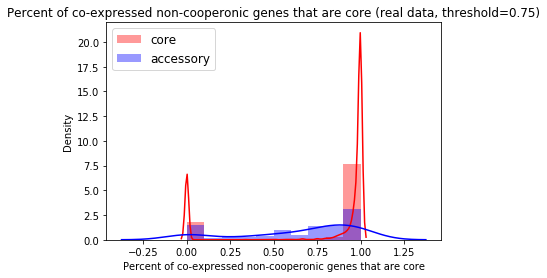

In [22]:
## Test: Distribution without removing 0 expressed and 0 non co-operonic genes

# Get bins using all data
hist, bins_core_real = np.histogram(np.concatenate([real_core_df['percent_non_cooperonic_coexpressed_core'].values,
                                                    real_acc_df['percent_non_cooperonic_coexpressed_core'].values]))

# Distribution plot for percent of core co-expressed genes in real data
sns.distplot(real_core_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='core', 
             color='red',
             bins=bins_core_real)
sns.distplot(real_acc_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='accessory',
             color='blue',
             bins=bins_core_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

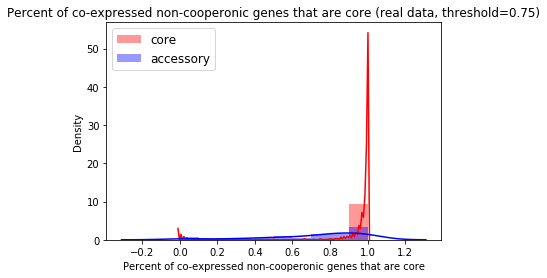

In [23]:
## Test: Distribution without removing 0 expressed and 0 non co-operonic genes

# Get bins using all data
hist, bins_core_real = np.histogram(np.concatenate([real_percent_core_with_refcore.values,
                                                    real_percent_core_with_refacc.values]))

# Distribution plot for percent of core co-expressed genes in real data
sns.distplot(real_percent_core_with_refcore.tolist(),
             label='core', 
             color='red',
             bins=bins_core_real)
sns.distplot(real_percent_core_with_refacc.tolist(),
             label='accessory',
             color='blue',
             bins=bins_core_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

In [24]:
# We only want to consider those genes with some co-expressed genes
shuffled_core_nan_ids = list(
    shuffled_percent_non_cooperonic_coexpressed_core_genes[
        shuffled_percent_non_cooperonic_coexpressed_core_genes.isna()].index)
shuffled_acc_nan_ids = list(
    shuffled_percent_non_cooperonic_coexpressed_acc_genes[
        shuffled_percent_non_cooperonic_coexpressed_acc_genes.isna()].index)

# We also only want to consider only those with some non-cooperonic genes
shuffled_core_zero_ids = list(shuffled_core_df[shuffled_core_df['num_non_cooperonic_coexpressed_genes'] == 0].index)
shuffled_acc_zero_ids = list(shuffled_acc_df[shuffled_acc_df['num_non_cooperonic_coexpressed_genes'] == 0].index)

# Get the union of excluded gene ids
shuffled_exclude_core_ids = set(shuffled_core_zero_ids).union(shuffled_core_nan_ids)
shuffled_exclude_acc_ids = set(shuffled_acc_zero_ids).union(shuffled_acc_nan_ids)

# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
shuffled_percent_core_with_refcore = shuffled_core_df['percent_non_cooperonic_coexpressed_core'].drop(labels=shuffled_exclude_core_ids)
shuffled_percent_core_with_refacc = shuffled_acc_df['percent_non_cooperonic_coexpressed_core'].drop(labels=shuffled_exclude_acc_ids)

Text(0, 0.5, 'Density')

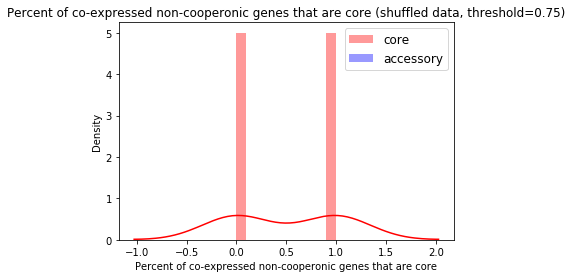

In [25]:
# Get bins using all data
hist, bins_core_shuffled = np.histogram(
    np.concatenate([shuffled_percent_core_with_refcore.values,
                    shuffled_percent_core_with_refacc.values]))

# Distribution plot for percent of core co-expressed genes in shuffled data
sns.distplot(shuffled_percent_core_with_refcore.tolist(), 
             label='core', 
             color='red',
             bins=bins_core_shuffled)
sns.distplot(shuffled_percent_core_with_refacc.tolist(),
             label='accessory', 
             color='blue',
             bins=bins_core_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

In [26]:
# Print statistics about non co-operonic co-expressed core genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_core_ids), (len(real_exclude_core_ids)/num_core_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(np.median(real_percent_core_with_refcore)*100))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_acc_ids), (len(real_exclude_acc_ids)/num_acc_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(np.median(real_percent_core_with_refacc)*100))

# shuffled data
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_core_ids), (len(shuffled_exclude_core_ids)/num_core_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(np.median(shuffled_percent_core_with_refcore)*100))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_acc_ids), (len(shuffled_exclude_acc_ids)/num_acc_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(np.median(shuffled_percent_core_with_refacc)*100))

Using a threshold of 0.75 to define co-expression (real data): 

- We removed 935 (17.483171278982798%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      100.0% (median) of co-expressed non co-operonic genes are core genes
- We removed 19 (9.45273631840796%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      79.86486486486486% (median) of co-expressed non co-operonic genes are core genes
Using a threshold of 0.75 to define co-expression (real data): 

- We removed 5346 (99.96260284218398%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      50.0% (median) of co-expressed non co-operonic genes are core genes
- We removed 201 (100.0%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, 

### Accessory gene relationships
For a given core gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are accessory?
Similarly, for a given accessory gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are accessory? 

In [27]:
# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
real_percent_acc_with_refcore = real_core_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=real_exclude_core_ids)
real_percent_acc_with_refacc = real_acc_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=real_exclude_acc_ids)

Text(0, 0.5, 'Density')

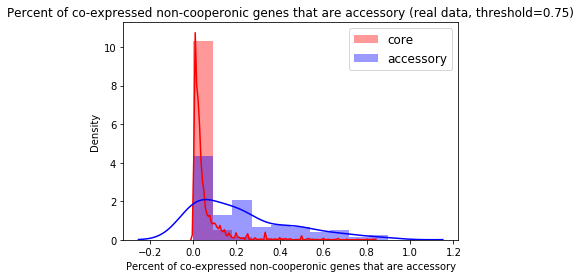

In [28]:
# Get bins using all data
hist, bins_acc_real = np.histogram(np.concatenate([real_percent_acc_with_refcore.values,
                                                   real_percent_acc_with_refacc.values]))

# Distribution plot for percent of accessory co-expressed genes in real data
sns.distplot(real_percent_acc_with_refcore.tolist(),
             label='core', 
             color='red', 
             bins=bins_acc_real)

sns.distplot(real_percent_acc_with_refacc.tolist(),
             label='accessory',
             color='blue', 
             bins=bins_acc_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are accessory (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are accessory')
plt.ylabel('Density')

In [29]:
# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
shuffled_percent_acc_with_refcore = shuffled_core_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=shuffled_exclude_core_ids)
shuffled_percent_acc_with_refacc = shuffled_acc_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=shuffled_exclude_acc_ids)

Text(0, 0.5, 'Density')

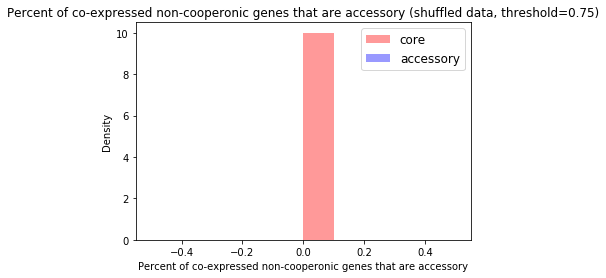

In [30]:
# Get bins using all data
hist, bins_acc_shuffled = np.histogram(
    np.concatenate([shuffled_percent_acc_with_refcore.values,
                    shuffled_percent_acc_with_refacc.values]))

# Distribution plot for percent of accessory co-expressed genes in shuffled data
sns.distplot(shuffled_percent_acc_with_refcore.tolist(), 
             label='core', 
             color='red',
             bins=bins_acc_shuffled)
sns.distplot(shuffled_percent_acc_with_refacc.tolist(), 
             label='accessory', 
             color='blue', 
             bins=bins_acc_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are accessory (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are accessory')
plt.ylabel('Density')

In [31]:
# Print statistics about non co-operonic co-expressed accessory genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_core_ids), (len(real_exclude_core_ids)/num_core_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(np.median(real_percent_acc_with_refcore)*100))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_acc_ids), (len(real_exclude_acc_ids)/num_acc_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(np.median(real_percent_acc_with_refacc)*100))

# shuffled data
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_core_ids), (len(shuffled_exclude_core_ids)/num_core_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(np.median(shuffled_percent_acc_with_refcore)*100))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_acc_ids), (len(shuffled_exclude_acc_ids)/num_acc_genes)*100))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(np.median(shuffled_percent_acc_with_refacc)*100))

Using a threshold of 0.75 to define co-expression (real data): 

- We removed 935 (17.483171278982798%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      0.0% (median) of co-expressed non co-operonic genes are accessory genes
- We removed 19 (9.45273631840796%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      17.92477235099338% (median) of co-expressed non co-operonic genes are accessory genes
Using a threshold of 0.75 to define co-expression (real data): 

- We removed 5346 (99.96260284218398%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      0.0% (median) of co-expressed non co-operonic genes are accessory genes
- We removed 201 (100.0%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expre

**Observation:**
* Core genes tend to be co-expressed with only other core genes
* Accessory genes tend to be co-expressed with some percent of core genes and accessory genes
* (control) There are no relationships between core-core, core-accessory, accessory-accessory

# Manually examine co-expressed and co-operonic genes

In [32]:
# Pull out genes that are co-expressed AND co-operonic -- what does it say in literature, TF
# Pull out genes that are co-expressed AND NOT co-operonic -- what does it say in literature, should they be in operon

In [33]:
nan_ids = list(real_percent_non_cooperonic_coexpressed_core_genes[real_percent_non_cooperonic_coexpressed_core_genes.
                                                                  isna()].index)

real_core_df.loc[nan_ids]

# Zero ids are those gene sets where the co-expressed genes were all in the same operon
# One ids are those gene sets where the co-expressed genes were all NOT in the same operon
zero_ids = list(
    real_percent_non_cooperonic_coexpressed_core_genes[real_percent_non_cooperonic_coexpressed_core_genes == 0].index)

real_core_df.loc[zero_ids].head(10)

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0882,PA0882,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA1216,PA1216,5,5,0,1.0,0.0,0,0,0,0.0,0.0
PA1715,PA1715,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA2408,PA2408,2,2,0,1.0,0.0,0,0,0,0.0,0.0
PA3329,PA3329,5,5,0,1.0,0.0,0,0,0,0.0,0.0
PA3935,PA3935,2,2,0,1.0,0.0,0,0,0,0.0,0.0
PA3937,PA3937,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA4023,PA4023,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA4150,PA4150,2,2,0,1.0,0.0,0,0,0,0.0,0.0
PA4301,PA4301,1,1,0,1.0,0.0,0,0,0,0.0,0.0
